In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def RungeKuttaStep(f, dt, t0, w0):
    f1 = f(t0, w0)
    f2 = f(t0 + (dt / 2), w0 + (dt / 2) * f1)
    f3 = f(t0 + (dt / 2), w0 + (dt / 2) * f2)
    f4 = f(t0, w0 + dt * f3)

    return w0 + (dt / 6) * (f1 + 2*f2 + 3*f3 + f4)


def RungeKuttaSolver(system, y0, l, r, points):
    m = len(system(l, y0))
    
    t = np.linspace(l, r, points)
    dt = (r - l) / points

    y = np.zeros((m, points))
    y[:, 0] = y0

    for i in range(points - 1):
        y[:, i + 1] = RungeKuttaStep(system, dt, t[i], y[:, i])

    return y
    

un pequeño ejemplo, para probar si sirve, la idea es quitarlo despues

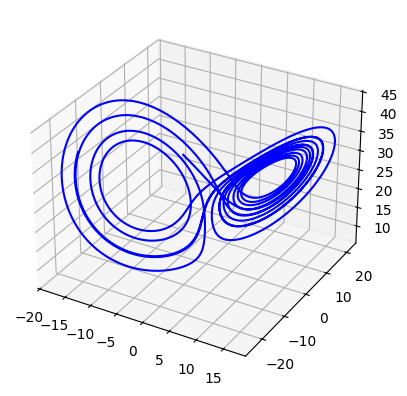

In [32]:
def lorenz(t, y):
    sigma = 10
    beta = 8 / 3
    rho = 28

    dy = [
        sigma*(y[1] - y[0]),
        y[0] * (rho - y[2]) - y[1],
        y[0] * y[1] - beta * y[2]
    ]

    return np.array(dy)

y0 = [-8, 8, 27]
ax = plt.figure().add_subplot(projection="3d")

y = RungeKuttaSolver(lorenz, y0, 0, 10, 4000)
ax.plot(y[0, :], y[1, :], y[2, :], 'b')
plt.show()